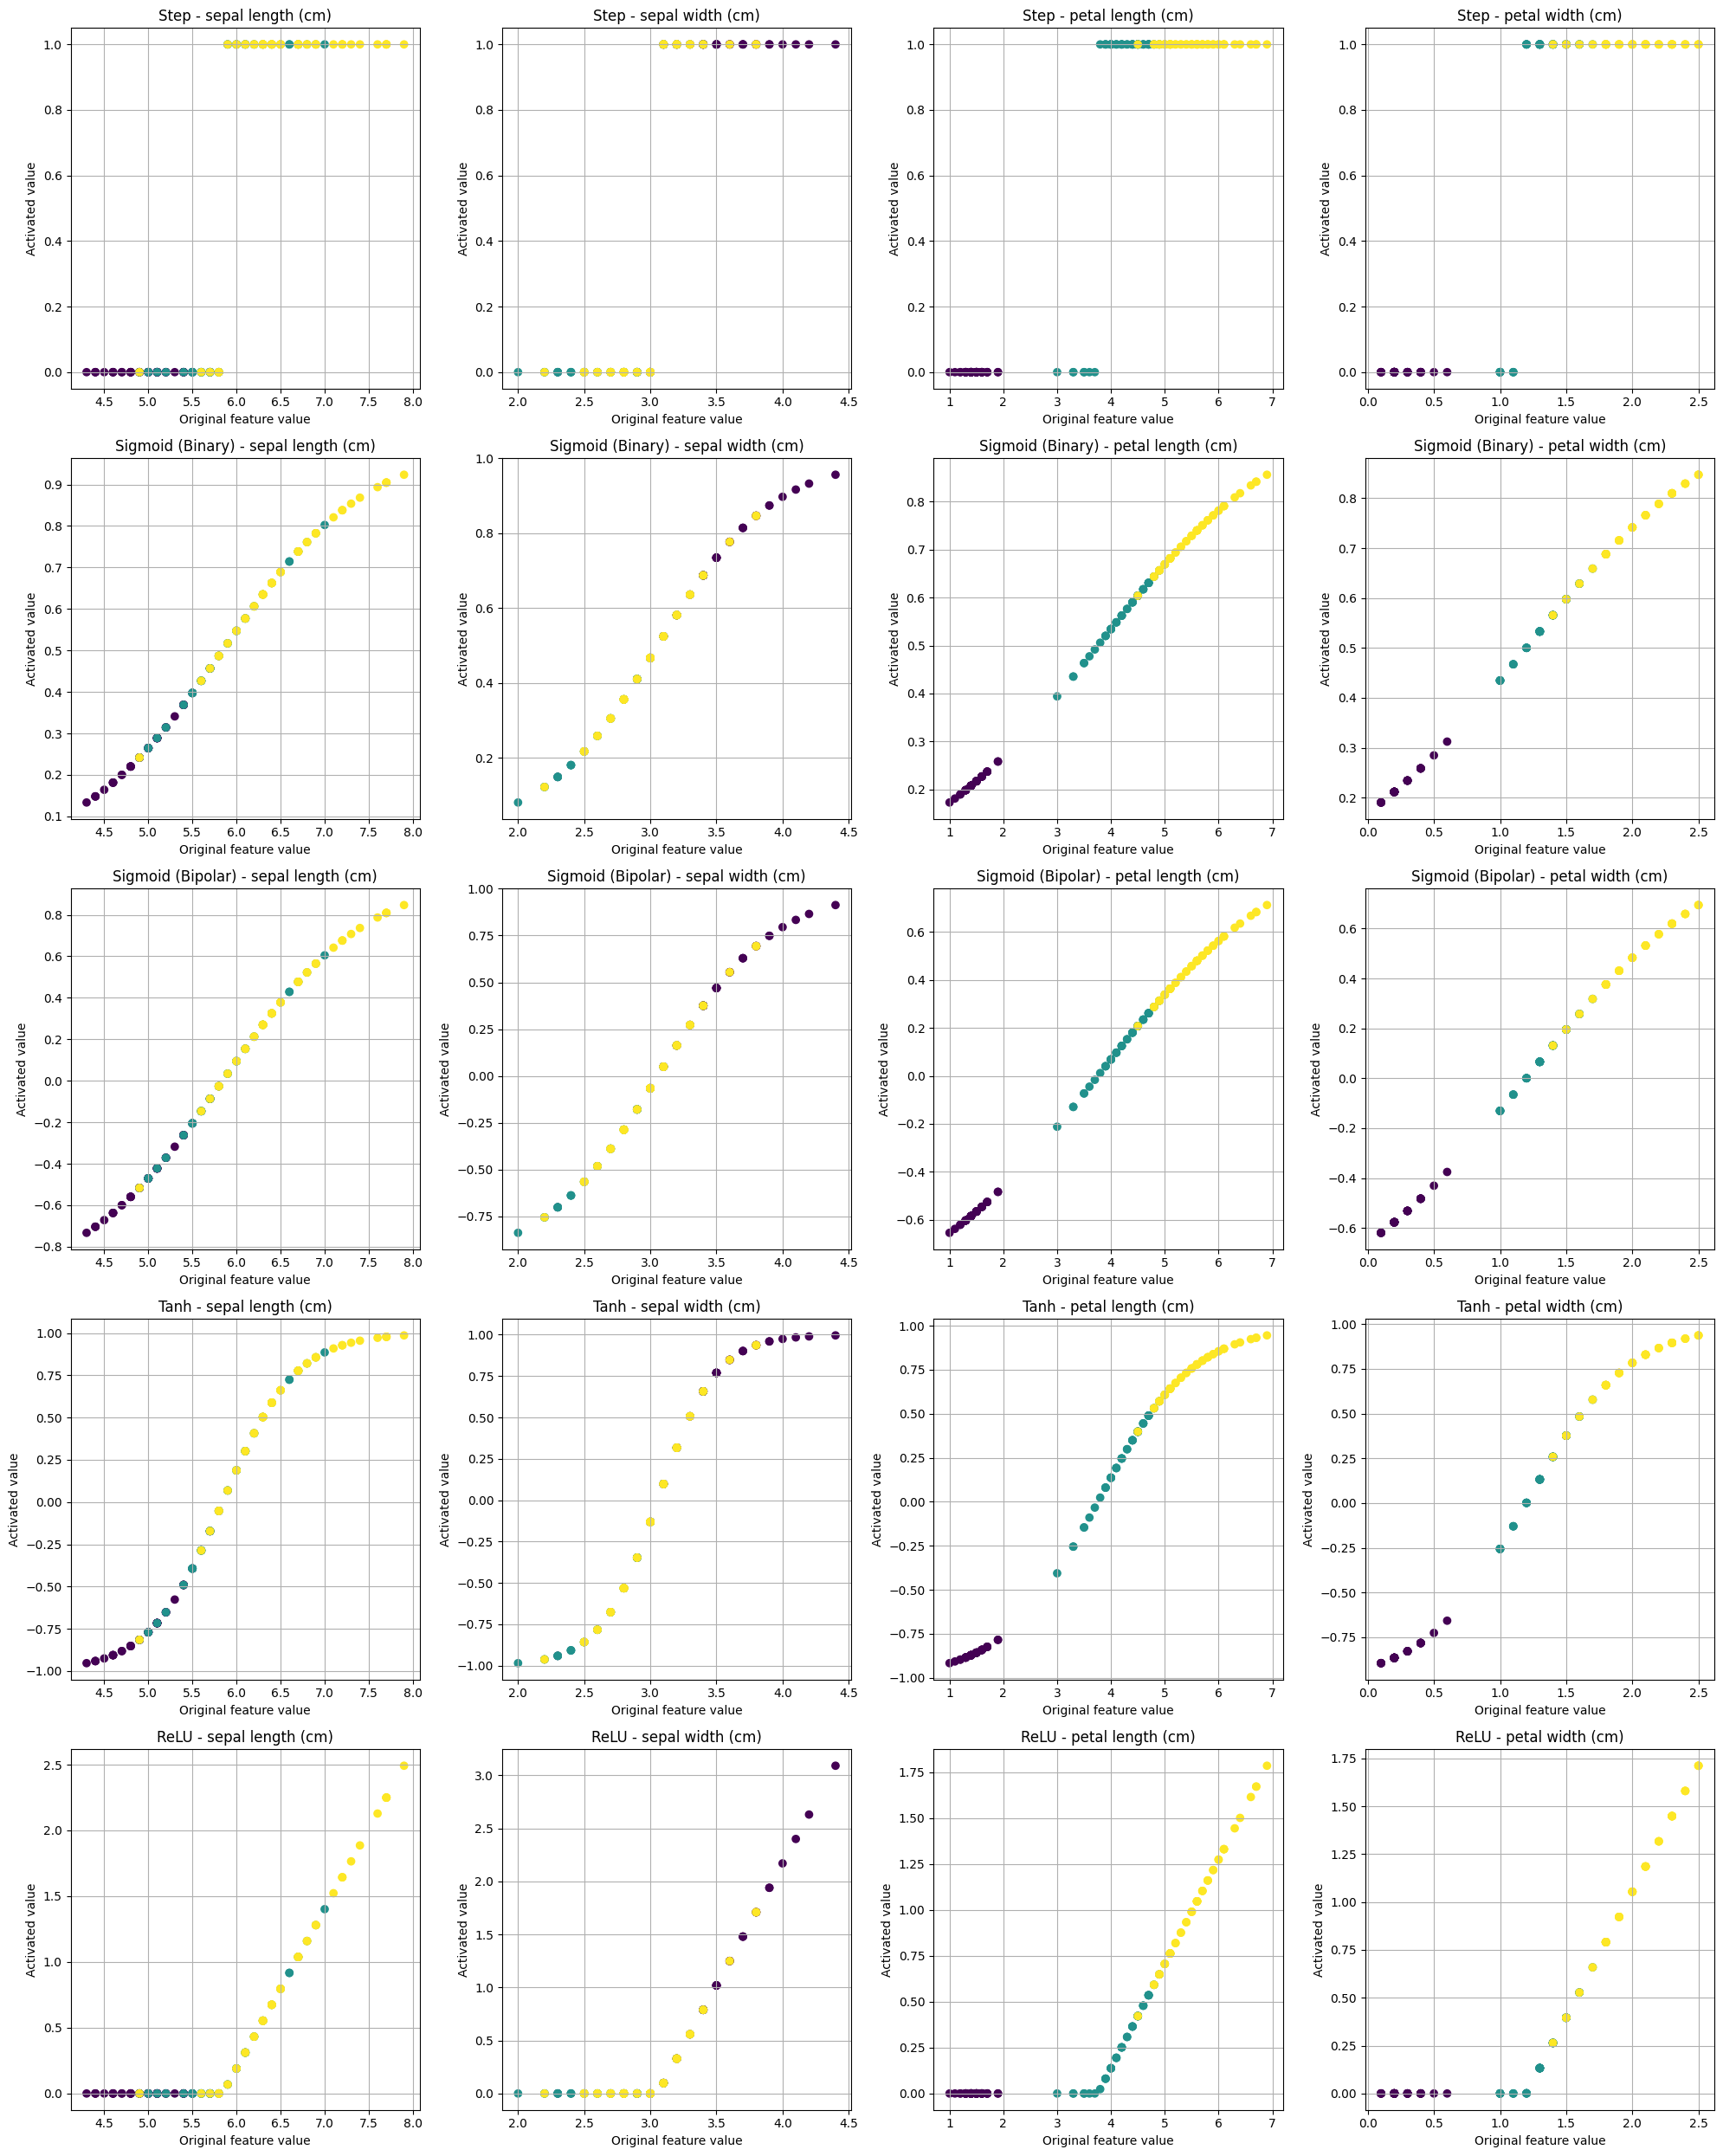

Original values: [-0.90068117 -1.14301691 -1.38535265 -1.50652052 -1.02184904]
Step: [0 0 0 0 0]
Sigmoid (Binary): [0.28891054 0.24176688 0.20015072 0.18145502 0.26466739]
Sigmoid (Bipolar): [-0.42217893 -0.51646623 -0.59969857 -0.63708995 -0.47066523]
Tanh: [-0.71662938 -0.81542748 -0.88214422 -0.90631963 -0.77061859]
ReLU: [0. 0. 0. 0. 0.]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_bipolar(x):
    return (2 / (1 + np.exp(-x))) - 1

def tanh_function(x):
    return np.tanh(x)

def relu_function(x):
    return np.maximum(0, x)

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

activations = {
    'Step': step_function,
    'Sigmoid (Binary)': sigmoid_binary,
    'Sigmoid (Bipolar)': sigmoid_bipolar,
    'Tanh': tanh_function,
    'ReLU': relu_function
}

# Create subplots
fig, axs = plt.subplots(len(activations), 4, figsize=(20, 25))

for i, (name, func) in enumerate(activations.items()):
    for j in range(4):
        # Apply activation function to the j-th feature
        activated = func(X_scaled[:, j])

        # Plot
        axs[i, j].scatter(X[:, j], activated, c=y, cmap='viridis')
        axs[i, j].set_title(f'{name} - {iris.feature_names[j]}')
        axs[i, j].set_xlabel('Original feature value')
        axs[i, j].set_ylabel('Activated value')
        axs[i, j].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print some sample results
print("Original values:", X_scaled[:5, 0])
for name, func in activations.items():
    print(f"{name}:", func(X_scaled[:5, 0]))

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network with different activation functions

# Sigmoid activation
model_sigmoid = Sequential()
model_sigmoid.add(Dense(16, input_dim=X_train.shape[1], activation='sigmoid'))  # Hidden layer with sigmoid activation
model_sigmoid.add(Dense(1, activation='sigmoid'))
model_sigmoid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Tanh activation
model_tanh = Sequential()
model_tanh.add(Dense(16, input_dim=X_train.shape[1], activation='tanh'))  # Hidden layer with tanh activation
model_tanh.add(Dense(1, activation='sigmoid'))
model_tanh.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ReLU activation
model_relu = Sequential()
model_relu.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with ReLU activation
model_relu.add(Dense(1, activation='sigmoid'))
model_relu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the models
model_sigmoid.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

model_tanh.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)


model_relu.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Evaluate the models on the test data
sigmoid_eval = model_sigmoid.evaluate(X_test, y_test, verbose=0)
tanh_eval = model_tanh.evaluate(X_test, y_test, verbose=0)
relu_eval = model_relu.evaluate(X_test, y_test, verbose=0)

print(f"Sigmoid Model Accuracy: {sigmoid_eval[1]:.4f}")
print(f"Tanh Model Accuracy: {tanh_eval[1]:.4f}")
print(f"ReLU Model Accuracy: {relu_eval[1]:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sigmoid Model Accuracy: 1.0000
Tanh Model Accuracy: 1.0000
ReLU Model Accuracy: 1.0000
